In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
class CosLearningRateDecay():
    # Note: stateless after initialization
    def __init__(self, start_epoch, stop_epoch, iters_per_epoch, max_lr, min_lr=0.0):
        self.start_epoch = start_epoch
#        self.start_iter = start_iter

        self.max_lr = max_lr
        self.min_lr = min_lr

        self.start_iters = (start_epoch - 1) * iters_per_epoch

        # spill one
        full_epochs_remaining = stop_epoch - start_epoch# + 1
        #this_epoch_iters_remaining = iters_per_epoch - start_iter
        print("start iters: ", self.start_iters)
        print("full epochs remaining: ", full_epochs_remaining)
        #total number of iterations to be completed this cosine cycle
        self.total_iters_this_cycle = full_epochs_remaining * iters_per_epoch #+ (this_epoch_iters_remaining - stop_iter)
    
    """
    params:
        total_iter: total number of iterations completed since start

    formula: 
    lr_min + 0.5*(lr_max - lr_min) * (1 + cos(pi*current_total_iter/target_iter))
    """
    def get_lr(self, total_iter):
        iters_elapsed = total_iter - self.start_iters
        print("Calculating Cos LR")
        print("Iterations elapsed this cycle: ", iters_elapsed)
        print("Total iterations to be completed this cycle: ", self.total_iters_this_cycle)
        learning_rate = self.min_lr
        learning_rate += 0.5*(self.max_lr - self.min_lr) * (1 + np.cos(np.pi * (iters_elapsed / self.total_iters_this_cycle)))
        return learning_rate

In [20]:
start_epoch = 100
stop_epoch = 110
iters_per_epoch = 2980
update_step_iters = 100
max_lr = 0.001

cos_decay = CosLearningRateDecay(start_epoch, stop_epoch, iters_per_epoch, max_lr)

total_iters = (stop_epoch - start_epoch)*iters_per_epoch
start_iters = (start_epoch - 1) * iters_per_epoch
xs = np.empty((int(total_iters/update_step_iters)))
ys = xs.copy()
for i in range(0, int(total_iters/update_step_iters)):
    iters = i*update_step_iters
    xs[i] = iters
    ys[i] = cos_decay.get_lr(start_iters + iters)
print(xs)

start iters:  295020
full epochs remaining:  10
Calculating Cos LR
Iterations elapsed this cycle:  0
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  100
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  200
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  300
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  400
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  500
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  600
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  700
Total iterations to be completed this cycle:  29800
Calculating Cos LR
Iterations elapsed this cycle:  800
Total iterations to be completed this cycle

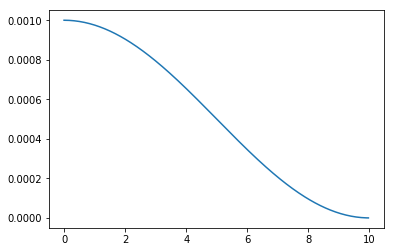

In [21]:
# plot learning rate versus epoch
plt.plot(xs/iters_per_epoch, ys)